**Mounting the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pip
pip.__version__

'21.1.3'

**Installing the Packages**

In [ ]:
!pip install ftfy langdetect googletrans pyspellchecker spacy plotly cufflinks xgboost textblob

     |████████████████████████████████| 53 kB 1.4 MB/s 
     |████████████████████████████████| 981 kB 25.8 MB/s 
     |████████████████████████████████| 2.7 MB 39.4 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 1.3 MB 41.8 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 65 kB 3.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=931b71625916ad506e85340813eeeb9f542c0cc56884ace18ec64c03fc691ac0
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=ca5a12508bf0e464d835d9416e472cc84db03beaef7b174f2cc1d668bcc6d833
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully 

**Importing The Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

from time import time
from PIL import Image
from zipfile import ZipFile
import os, sys, itertools, re
import warnings, pickle, string
import cufflinks as cf
from ftfy import fix_encoding, fix_text, badness
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

**Importing the Data**
- reading data with pandas library
- getting our dataset excel file from google drive directory

In [ ]:
data_set = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/nlp_data_set.xlsx')

- Describing our dataset

In [ ]:
data_set.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


- reading first 5 rows of the dataset

In [ ]:
data_set.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


- reading last 5 rows of the dataset

In [ ]:
data_set.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49


- checking shape of the data

In [ ]:
data_set.shape

(8500, 4)

- Printing number of rows and columns in the dataset

In [ ]:
print('No of rows:\033[1m', data_set.shape[0], '\033[0m')
print('No of cols:\033[1m', data_set.shape[1], '\033[0m')

No of rows: 8500 
No of cols: 4 


- checking null values in the data

In [ ]:
data_set.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

- printing the rows and columms with null values

In [ ]:
data_set[pd.isnull(data_set).any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,_x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...,ohdrnswl rezuibdt,GRP_34
3383,NaN,_x000D_\n-connected to the user system using t...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn._x000D_\n-connect...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn._x000D_\n-connect...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn._x000D_\n-connect...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn._x000D_\n-connect...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,_x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


**Filling Missing data**
- filling empty rows and columns with 'na'

In [ ]:
data_set.fillna(str(), inplace=True)

In [ ]:
data_set[pd.isnull(data_set).any(axis=1)]

,Short description,Description,Caller,Assignment group


In [ ]:
data_set.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [ ]:
data_set = data_set.replace(r'\n',' ', regex=True) 

### **EDA and Data Visualization**
- printing number of groups in Assignment group column

In [ ]:
data_set['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

- Assignment group column has 74 classes

In [ ]:
print("Total no. of Assignment Groups:", len(data_set['Assignment group'].unique()))

Total no. of Assignment Groups: 74


In [ ]:
df_inc = data_set['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


- Visualizing the % of tickets per assignment group

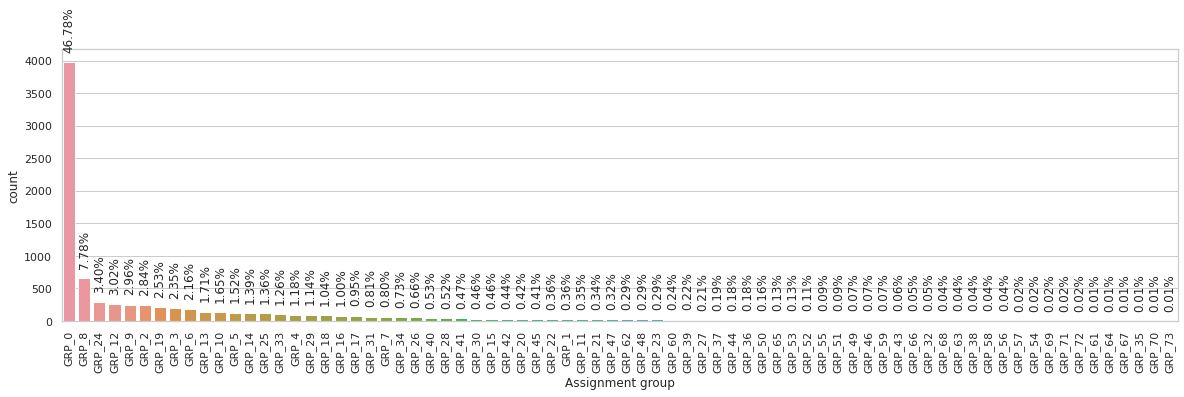

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=data_set, order=data_set["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(data_set.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

*Observation*
- The majority of tickets fall under Grp_0.
- Second highest is Grp_8, third is Gpr_24 and so on.
- We notice a data imbalance in our dataset.
- There are 1 & 2 tickets in few classes, 10 is the average tickets per class.

- Let's see the arranged dataset with tickets ranging from highest to lowest per group.

In [ ]:
ds_74 = data_set['Assignment group'].value_counts().nlargest(74).reset_index()
ds_74

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
...,...,...
69,GRP_64,1
70,GRP_67,1
71,GRP_35,1
72,GRP_70,1


- Visualizing the highest to lowest tickets for our data

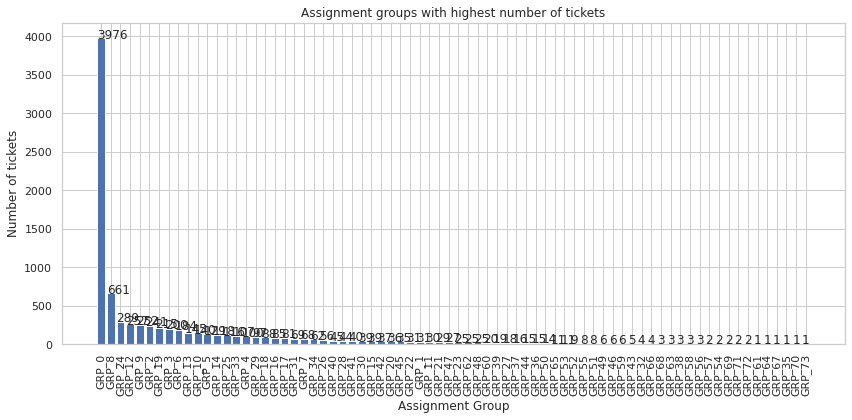

In [ ]:
plt.figure(figsize=(12,6))
bars = plt.bar(ds_74['index'],ds_74['Assignment group'])
plt.title('Assignment groups with highest number of tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

- Visualizing with distribution of tickets in different bins in %.

In [ ]:
df_bins = pd.DataFrame(columns=['Description','data_set Count'])
one_data_set = {'Description':'1 data_set','data_set Count':len(df_inc[df_inc['Assignment group'] < 2])}
_2_5_data_set = {'Description':'2-5 data_set',
              'data_set Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 6) ])}
_10_data_set = {'Description':' 6-10 data_set',
              'data_set Count':len(df_inc[(df_inc['Assignment group'] > 5)& (df_inc['Assignment group'] < 11)])}
_10_20_data_set = {'Description':' 11-20 data_set',
              'data_set Count':len(df_inc[(df_inc['Assignment group'] > 10)& (df_inc['Assignment group'] < 21)])}
_20_50_data_set = {'Description':' 21-50 data_set',
              'data_set Count':len(df_inc[(df_inc['Assignment group'] > 20)& (df_inc['Assignment group'] < 51)])}
_51_100_data_set = {'Description':' 51-100 data_set',
              'data_set Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_data_set = {'Description':' >100 data_set',
              'data_set Count':len(df_inc[(df_inc['Assignment group'] > 100)])}

In [ ]:
df_bins = df_bins.append([one_data_set,_2_5_data_set,_10_data_set,
                          _10_20_data_set,_20_50_data_set,_51_100_data_set,_100_data_set], ignore_index=True)

df_bins

,Description,data_set Count
0,1 data_set,6
1,2-5 data_set,13
2,6-10 data_set,6
3,11-20 data_set,9
4,21-50 data_set,16
5,51-100 data_set,9
6,>100 data_set,15


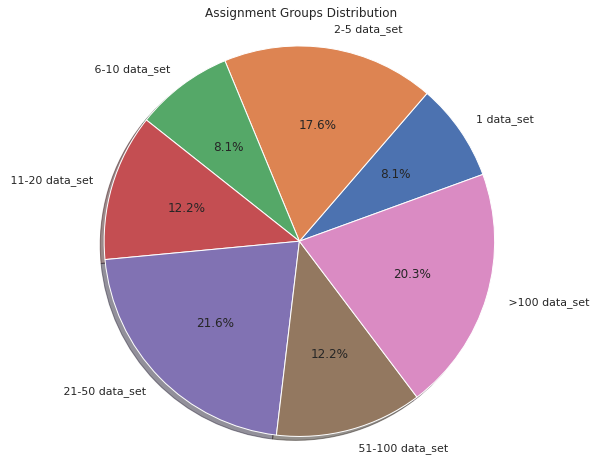

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['data_set Count'],labels=df_bins['Description'],autopct='%2.1f%%', startangle=20, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

- L1/L2 & L3 distribution in our ticket dataset

Text(0, 0.5, 'samples')

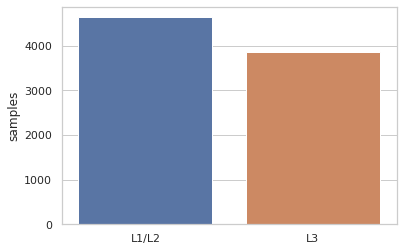

In [ ]:
ds_incidents_level = data_set.copy()
ds_incidents_level['Target'] = np.where(ds_incidents_level['Assignment group']=='GRP_0','L1/L2',np.where(ds_incidents_level['Assignment group'] =='GRP_8','L1/L2','L3'))

x=ds_incidents_level.Target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

In [ ]:
ds_incidents_level["short_description_nupper"] = ds_incidents_level["Short description"].apply((lambda word: len([x for x in word.split() if x.isupper()])))
ds_incidents_level[["Short description","short_description_nupper"]].sort_values(by = "short_description_nupper",ascending = False).head()

,Short description,short_description_nupper
4693,hzptilsw wusdajqv : log on balancing error for...,2
5964,add im:mfg_planner_reference to the miiadmin e...,2
4976,"please check the ale in detail, we have ongoin...",2
1848,erp SID_34 and erp SID_1 password reset,2
4324,reset password user zigioachstyac - SID_34 /SI...,2


- Visualizing L1/L2 & L3 upper case words on short discription

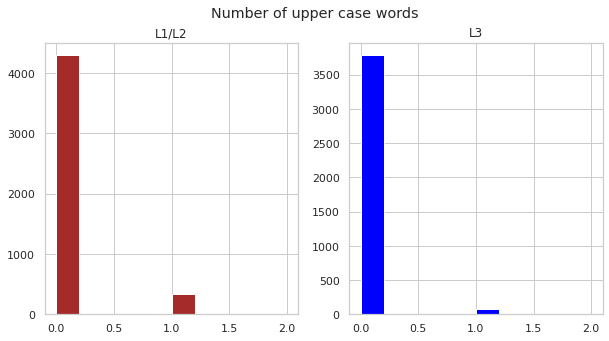

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=ds_incidents_level[ds_incidents_level['Target']=='L1/L2']['short_description_nupper']
ax1.hist(text_len.dropna(),color='brown')
ax1.set_title('L1/L2')
text_len=ds_incidents_level[ds_incidents_level['Target']=='L3']['short_description_nupper']
ax2.hist(text_len.dropna(),color='blue')
ax2.set_title('L3')
fig.suptitle('Number of upper case words')
plt.show()

- checking for digits in short discription column

In [ ]:
ds_incidents_level["short_description_ndigits"] = ds_incidents_level["Short description"].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
ds_incidents_level[["Short description","short_description_ndigits"]].sort_values(by = "short_description_ndigits",ascending = False).head()

,Short description,short_description_ndigits
5469,sto 5019179518 is for 2 pcs of material 631688...,4
2867,prdord 226040587 226040835 226040589 2...,4
6287,i am stuck. has 3 lines. lines 40 and 50...,4
145,unable to start dell 7350 2 in 1 device,3
3235,no audio in dell 7350 2 in 1 tablet,3


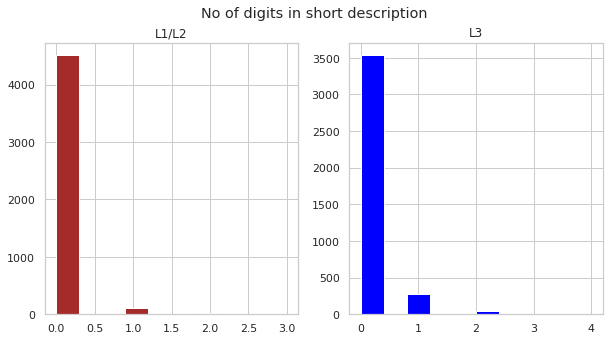

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=ds_incidents_level[ds_incidents_level['Target']=='L1/L2']['short_description_ndigits']
ax1.hist(text_len.dropna(),color='brown')
ax1.set_title('L1/L2')
text_len=ds_incidents_level[ds_incidents_level['Target']=='L3']['short_description_ndigits']
ax2.hist(text_len.dropna(),color='blue')
ax2.set_title('L3')
fig.suptitle('No of digits in short description')
plt.show()

### **Data Cleaning**
- We are using Mojibake feature to remove garbled text, this helps us decode texts which are unintended character encoding format. This replaces unrelated writing system to something readable
- This feature detects Mojibake characters in our dataset and replaces them

In [ ]:
from ftfy import badness

def is_mojibake_impacted(text):
    if not badness.sequence_weirdness(text):
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        return True
    else:
        return False
    
data_set[~data_set.iloc[:,:-1].applymap(is_mojibake_impacted).all(1)]

,Short description,Description,Caller,Assignment group
99,password expiry tomorrow,received from: ecprjbod.litmjwsy@gmail.com ...,ecprjbod litmjwsy,GRP_0
116,server issues,_x000D_ _x000D_ received from: bgqpotek.cuxakv...,bgqpotek cuxakvml,GRP_0
124,mobile device activation,"from: tvcdfqgp nrbcqwgj sent: friday, october...",tvcdfqgp nrbcqwgj,GRP_0
162,access to bex,_x000D_ _x000D_ received from: yfqoaepn.xnezhs...,yfqoaepn xnezhsit,GRP_0
164,æ’¤å›ž: ticket_no1564867 -- comments added,received from: abcdri@company.com windy shi...,tycludks cjofwigv,GRP_0
...,...,...,...,...
8470,please review your recent ticketing_tool ticke...,"from: mikhghytr wafglhdrhjop sent: thursday, ...",azxhejvq fyemlavd,GRP_16
8471,ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥,to å°è´ºï¼Œæ—©ä¸Šç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥,xqyjztnm onfusvlz,GRP_30
8480,customer group enhanced field,_x000D_ _x000D_ received from: nlearzwi.ukdzst...,nlearzwi ukdzstwi,GRP_9
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


- Mojibake characters being replaced with something readable, in our case it gives characters from a different language. There are possibilities that we might get differnet language texts.

In [ ]:
print('Grabled text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (data_set['Short description'][8471], 
                                                                        fix_text(data_set['Short description'][8471])))

Grabled text: ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥
Fixed text: 电脑开机开不出来


- Sanitization of columns from Mojibake

In [ ]:
data_set['Short description'] = data_set['Short description'].apply(fix_text)
data_set['Description'] = data_set['Description'].apply(fix_text)

data_set.iloc[8471,:]

Short description             电脑开机开不出来
Description           to 小贺,早上电脑开机开不出来
Caller               xqyjztnm onfusvlz
Assignment group                GRP_30
Name: 8471, dtype: object

- Saving dataset cleaned from Mojibake in our google drive directory

In [ ]:
data_set.to_csv('/content/drive/MyDrive/Colab Notebooks/ds_gibbrish_removed.csv', index=False, encoding='utf_8_sig')
with open('mojibake_treated.pkl', 'wb') as handle:
    pickle.dump(data_set, handle, protocol=pickle.HIGHEST_PROTOCOL)

- Reading the dataset

In [ ]:
data_set

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_ _x000D_ received from: hmjdrvpb.komuay...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_ _x000D_ received from: eylqgodm.ybqkwi...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,_x000D_ _x000D_ received from: avglmrts.vhqmti...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine não está funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


- Further cleaning process
- We see many unwanted characters, email formats, keywords, etc. need to remove them from our dataset

In [ ]:
EMAIL_PATTERN = r"([\w.+-]+@[a-z\d-]+\.[a-z\d.-]+)"
PUNCT_PATTERN = r"[,|@|\|?|\\|$&*|%|\r|\n|.:|\s+|/|//|\\|/|\||-|<|>|;|(|)|=|+|#|-|\"|[-\]]|{|}]"
NUMER_PATTERN = r"(?<!RetainedEmailId)(\d+(?:\.\d+)?)"

def cleanseText(text):
    text = str(text).lower()
    email_dict = extract_email(text)
    for key in email_dict.keys():
        text = text.replace(email_dict[key], key)
    text = re.sub(NUMER_PATTERN, '', text)
    text = text.translate(str.maketrans("","", string.punctuation))
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r' {2,}', " ", text, flags=re.MULTILINE)
    text = text.replace('`',"'")
    for key in email_dict.keys():
        text = text.replace(key, email_dict[key])
    return text.strip()

def extract_email(text):
    unique_emailid = set(re.findall(EMAIL_PATTERN, text))
    email_replacement = dict()
    for idx, email in enumerate(unique_emailid):
        email_replacement[f'RetainedEmailId{idx}'] = email
    return email_replacement

- printing Original sentence text and Cleaned sentence text

In [ ]:
print('\033[1mOriginal text:\033[0m')
print(data_set['Description'][32])
print('_'*100)
print('\033[1mCleaned text:\033[0m')
print(cleanseText(data_set['Description'][32]))

Original text:
  received from: kxsceyzo.naokumlb@gmail.com  gentles,  i have two devices that are trying to share an ip address. they are trying to share 96.26.27.9619. one is a printer with the hostname of prtjc0074, and the other is a new display for erp. the display is using dhcp to get its address assigned and the printer is hard coded.  my guess is that the address 96.26.27.9619 did not get set to a static address in dhcp. i need this corrected so the display will pick up another address.  
____________________________________________________________________________________________________
Cleaned text:
received from kxsceyzo.naokumlb@gmail.com gentles i have two devices that are trying to share an ip address they are trying to share one is a printer with the hostname of prtjc and the other is a new display for erp the display is using dhcp to get its address assigned and the printer is hard coded my guess is that the address did not get set to a static address in dhcp i need thi

- verifying if the cleaning procedure is implemented on every row in Short decription and Description columns

In [ ]:
data_set['Description'] = data_set['Description'].apply(cleanseText)
data_set['Short description'] = data_set['Short description'].apply(cleanseText)

data_set.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,xd xd received from avglmrts.vhqmtiua@gmail.co...,avglmrts vhqmtiua,GRP_29
8496,telephonysoftware issue,telephonysoftware issue,rbozivdq gmlhrtvp,GRP_0
8497,vip windows password reset for tifpdchb pedxruyf,vip windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,GRP_0
8498,machine não está funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62
8499,an mehreren pcs lassen sich verschiedene prgra...,an mehreren pcs lassen sich verschiedene prgra...,kqvbrspl jyzoklfx,GRP_49


- Removing 'xd' characters from Description column

In [ ]:
def clean_xd(text):
  text = ' '.join(re.sub("xd"," ", text).split())
  return text

data_set['Description'] = data_set['Description'].apply(clean_xd)

- Verifying if 'xd' characters are removed

In [ ]:
data_set.head()

,Short description,Description,Caller,Assignment group
0,login issue,verified user detailsemployee manager name che...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from hmjdrvpb.komuaywn@gmail.com hell...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,received from eylqgodm.ybqkwiam@gmail.com hi i...,eylqgodm ybqkwiam,GRP_0
3,unable to access hrtool page,unable to access hrtool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


- encoding our dataset Description column with ascii

In [ ]:
def fn_decode_to_ascii(df):
  text = df.encode().decode('utf-8').encode('ascii', 'ignore')
  return text.decode("utf-8") 

data_set['Description'] = data_set['Description'].apply(fn_decode_to_ascii)

In [ ]:
data_set.head()

,Short description,Description,Caller,Assignment group
0,login issue,verified user detailsemployee manager name che...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from hmjdrvpb.komuaywn@gmail.com hell...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,received from eylqgodm.ybqkwiam@gmail.com hi i...,eylqgodm ybqkwiam,GRP_0
3,unable to access hrtool page,unable to access hrtool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


### **Data Translation and Language Detection** 
- Here we are using language detection library langdetect to print the languages present in our dataset Description column

In [ ]:
from langdetect import detect
    
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'N/A'                                                  

data_set['language'] = data_set['Description'].apply(fn_lan_detect)


In [ ]:
data_set["language"].value_counts()

en     6997
de      394
af      273
it      170
fr      111
sv       69
no       66
nl       65
es       52
ca       52
N/A      38
da       35
pl       33
sl       24
pt       22
tl       15
cy       14
ro       14
et       13
sq        8
fi        6
hr        6
so        5
id        4
lv        4
sk        3
lt        3
sw        2
tr        1
cs        1
Name: language, dtype: int64

- Visualizing the languages present in our dataset

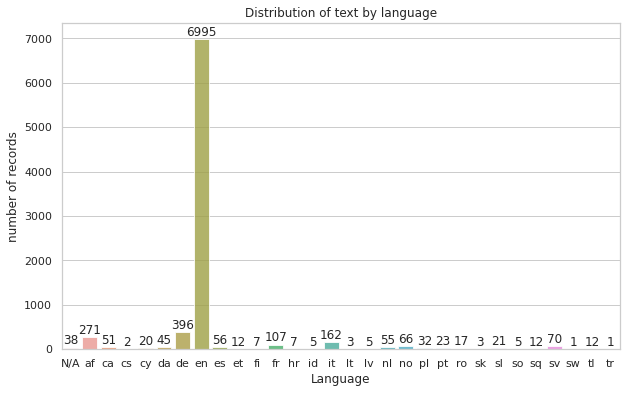

In [ ]:
x = data_set["language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

- Translating the text with googletrans library

In [ ]:
import googletrans
from googletrans import Translator

def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df
    
    
data_set['Description'] = data_set.apply(lambda x: fn_translate(x['Description'], x['language']), axis=1)

In [ ]:
data_set[data_set["Short description"].str.contains("account lock")]["Assignment group"].value_counts()

GRP_0     227
GRP_2       3
GRP_34      1
GRP_72      1
Name: Assignment group, dtype: int64

- Importing necessary libraries for further operation

In [ ]:
import string
import re
from collections import Counter
from nltk.corpus import stopwords

### **Data Cleaning Continues**
- removing unwanted texts even deeper

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    index1=text.find('from:')
    index2=text.find('\nsddubject:')
    text=text.replace(text[index1:index2],'')
    index3=text.find('[cid:image')
    index4=text.find(']')
    text=text.replace(text[index3:index4],'')
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('gmail.com', '')
    text=text.replace('company.com', '')
    text=text.replace('microsoftonline.com', '')
    text=text.replace('company.onmicrosoft.com', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    text=text.replace('regards', '')

    text = re.sub(r'\S+@\S+', '', text)
    custom_punctuation='!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~'
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\r\n', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\S+@\S+', '', text)

    text = text.lower()
    return text

In [ ]:
data_set['Description'] = data_set['Description'].apply(lambda x: clean_text(x))

In [ ]:
data_set.head()

,Short description,Description,Caller,Assignment group,language
0,login issue,verified user detailsemployee manager name che...,spxjnwir pjlcoqds,GRP_0,en
1,outlook,received from hmjdrvpbkomuaywn team my meetin...,hmjdrvpb komuaywn,GRP_0,en
2,cant log in to vpn,received from eylqgodmybqkwiam i cannot log o...,eylqgodm ybqkwiam,GRP_0,en
3,unable to access hrtool page,unable to access hrtool page,xbkucsvz gcpydteq,GRP_0,it
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,no


### **Stop Words Removal**

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')
data_set['Description'] = data_set['Description'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
data_set['Description'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    verified user detailsemployee manager name che...
1    received hmjdrvpbkomuaywn team meetingsskype m...
2             received eylqgodmybqkwiam cannot log vpn
3                            unable access hrtool page
4                                          skype error
Name: Description, dtype: object

In [ ]:
callers = data_set['Caller'].unique() 
callers.shape
from dateutil import parser
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

def adv_clean_data(text):
    text=text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove Non Dictionary character-TODO
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text
  
data_set['Description'] = data_set['Description'].apply(adv_clean_data)

In [ ]:
data_set.head()

,Short description,Description,Caller,Assignment group,language
0,login issue,verified user detailsemployee manager name che...,spxjnwir pjlcoqds,GRP_0,en
1,outlook,received team meetingsskype meetings etc appea...,hmjdrvpb komuaywn,GRP_0,en
2,cant log in to vpn,received cannot log vpn,eylqgodm ybqkwiam,GRP_0,en
3,unable to access hrtool page,unable access hrtool page,xbkucsvz gcpydteq,GRP_0,it
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,no


### **Lemmatization**

In [ ]:
from textblob import Word

nltk.download('wordnet')

data_set['Description']= data_set['Description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
data_set['Description'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    verified user detailsemployee manager name che...
1    received team meetingsskype meeting etc appear...
2                              received cannot log vpn
3                            unable access hrtool page
4                                          skype error
Name: Description, dtype: object

In [ ]:
data_set['num_wds'] = data_set['Description'].apply(lambda x: len(x.split()))
data_set['num_wds'].mean()

15.598117647058823

In [ ]:
print(data_set['num_wds'].max())

738


In [ ]:
print(data_set['num_wds'].min())

0


In [ ]:
print(len(data_set[data_set['num_wds']==0]))

99


In [ ]:
data_set= data_set[data_set['num_wds']>1]

In [ ]:
data_set.shape

(8311, 6)

In [ ]:
print(data_set['num_wds'].max())
print(data_set['num_wds'].min())

738
2


In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))


data_set['avg_word'] = data_set['Description'].apply(lambda x: avg_word(str(x)))
data_set.head()

,Short description,Description,Caller,Assignment group,language,num_wds,avg_word
0,login issue,verified user detailsemployee manager name che...,spxjnwir pjlcoqds,GRP_0,en,21,6.00
1,outlook,received team meetingsskype meeting etc appear...,hmjdrvpb komuaywn,GRP_0,en,12,6.75
2,cant log in to vpn,received cannot log vpn,eylqgodm ybqkwiam,GRP_0,en,4,5.00
3,unable to access hrtool page,unable access hrtool page,xbkucsvz gcpydteq,GRP_0,it,4,5.50
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,no,2,5.00


In [ ]:
data_set['uniq_wds'] = data_set['Description'].str.split().apply(lambda x: len(set(x)))
data_set['uniq_wds'].head()

0    17
1    12
2     4
3     4
4     2
Name: uniq_wds, dtype: int64

In [ ]:
print(data_set['uniq_wds'].mean())

12.565034291902299


In [ ]:
print(data_set['uniq_wds'].min())
print(data_set['uniq_wds'].max())

2
432


In [ ]:
wd_counts = Counter()
for i, row in data_set.iterrows():
    wd_counts.update(row['Description'].split())
    
wd_counts.most_common(20)

[('received', 2355),
 ('yesnona', 1568),
 ('job', 1550),
 ('t', 1441),
 ('user', 1363),
 ('password', 1257),
 ('erp', 1138),
 ('monitoringtool', 979),
 ('jobscheduler', 969),
 ('issue', 952),
 ('failed', 906),
 ('reset', 843),
 ('company', 782),
 ('unable', 779),
 ('error', 775),
 ('account', 757),
 ('sid', 750),
 ('email', 735),
 ('access', 719),
 ('ticket', 707)]

In [ ]:
data_set.head()

,Short description,Description,Caller,Assignment group,language,num_wds,avg_word,uniq_wds
0,login issue,verified user detailsemployee manager name che...,spxjnwir pjlcoqds,GRP_0,en,21,6.00,17
1,outlook,received team meetingsskype meeting etc appear...,hmjdrvpb komuaywn,GRP_0,en,12,6.75,12
2,cant log in to vpn,received cannot log vpn,eylqgodm ybqkwiam,GRP_0,en,4,5.00,4
3,unable to access hrtool page,unable access hrtool page,xbkucsvz gcpydteq,GRP_0,it,4,5.50,4
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,no,2,5.00,2


In [ ]:
data_set.describe()

,num_wds,avg_word,uniq_wds
count,8311.000000,8311.000000,8311.000000
mean,15.942005,6.538142,12.565034
std,35.751216,1.599683,19.124372
min,2.000000,2.000000,2.000000
25%,4.000000,5.517880,4.000000
50%,7.000000,6.333333,6.000000
75%,16.000000,7.333333,15.000000
max,738.000000,35.333333,432.000000


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8311 entries, 0 to 8499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Short description  8311 non-null   object 
 1   Description        8311 non-null   object 
 2   Caller             8311 non-null   object 
 3   Assignment group   8311 non-null   object 
 4   language           8311 non-null   object 
 5   num_wds            8311 non-null   int64  
 6   avg_word           8311 non-null   float64
 7   uniq_wds           8311 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 584.4+ KB


In [ ]:
data_set.to_csv("/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv",index=False)

In [ ]:
data_set=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv")

In [ ]:
callers = data_set['Caller'].unique() 
callers.shape


from dateutil import parser
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

def adv_clean_data(text):
    text=str(text).lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'\d+','' ,text) 
    text = re.sub(r'\n',' ',text)
    text = re.sub(r'#','', text)
    text = re.sub(r'&;?', 'and',text)
    text = re.sub(r'\&\w*;', '', text)
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]"," ", text).split())
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

In [ ]:
data_set.head()

,Short description,Description,Caller,Assignment group,language
0,login issue,verified user detailsemployee manager name che...,spxjnwir pjlcoqds,GRP_0,en
1,outlook,received team meetingsskype meeting etc appear...,hmjdrvpb komuaywn,GRP_0,en
2,cant log in to vpn,received cannot log vpn,eylqgodm ybqkwiam,GRP_0,en
3,unable to access hrtool page,unable access hrtool page,xbkucsvz gcpydteq,GRP_0,it
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,no


### **Word Cloud**
- Using WordCloud to Visualize types of words used in Short Description and Desctiption columns

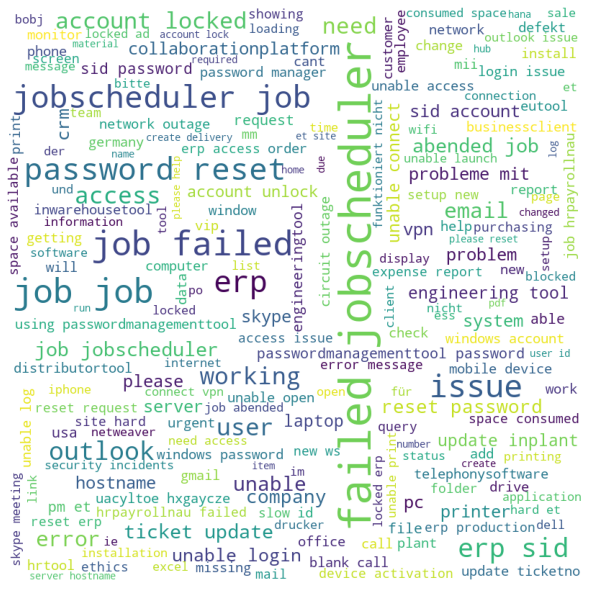

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
for val in data_set['Short description']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

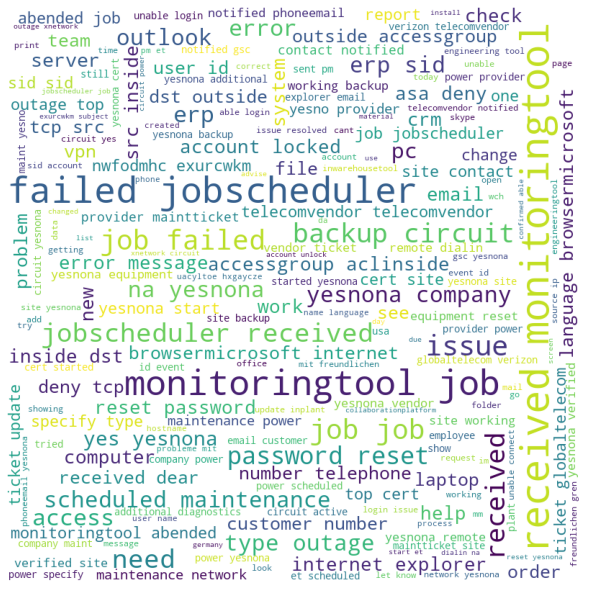

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
for val in data_set['Description']: 
    val = str(val) 
    tokens = val.split() 

    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word') 
  plt.show()
  return d

d = freq_words(data_set['Description'], 100)

In [ ]:
data_set['GRP_MOD'] = data_set['Assignment group'].apply(lambda x: 'GRP_X' if x != 'GRP_0' else x)

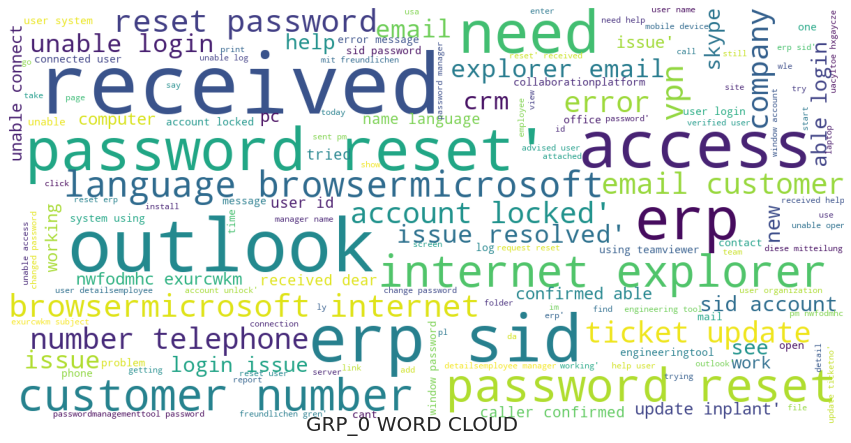

In [ ]:
def show_wordcloud(data, title):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

text_Str = data_set['Description'][data_set['GRP_MOD'].isin(["GRP_0"])].tolist()
show_wordcloud(text_Str, "GRP_0 WORD CLOUD")

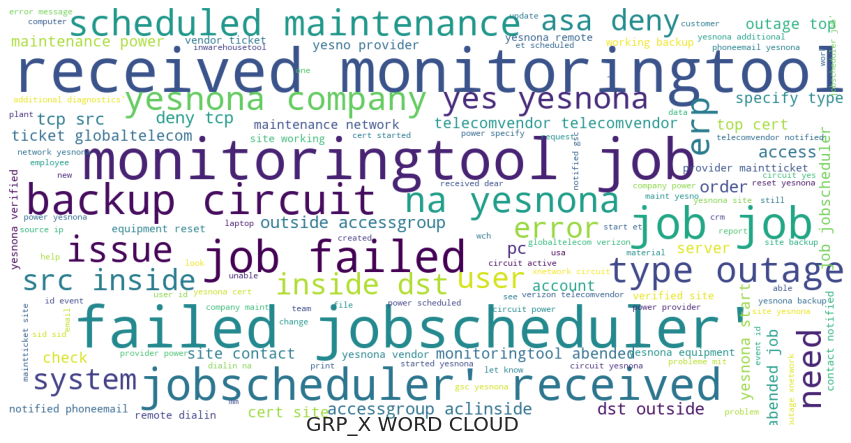

In [ ]:
text_Str = data_set['Description'][data_set['GRP_MOD'].isin(["GRP_X"])].tolist()
show_wordcloud(text_Str, "GRP_X WORD CLOUD")

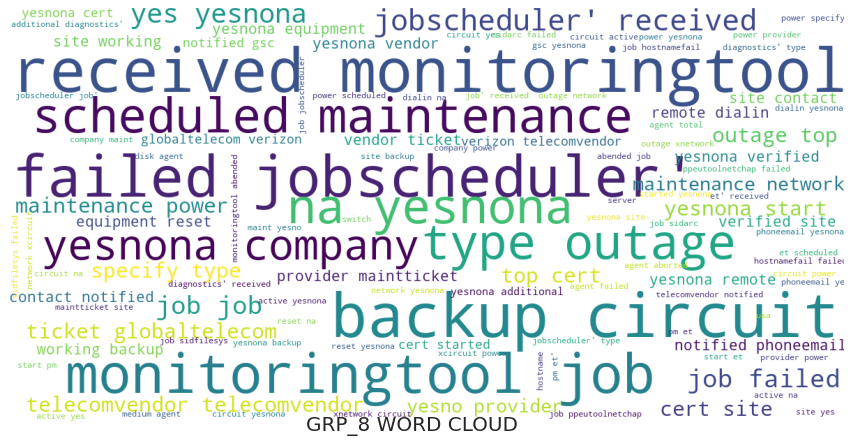

In [ ]:
text_Str1 = data_set['Description'][data_set['Assignment group'].isin(["GRP_8"])].tolist()
show_wordcloud(text_Str1,"GRP_8 WORD CLOUD" )

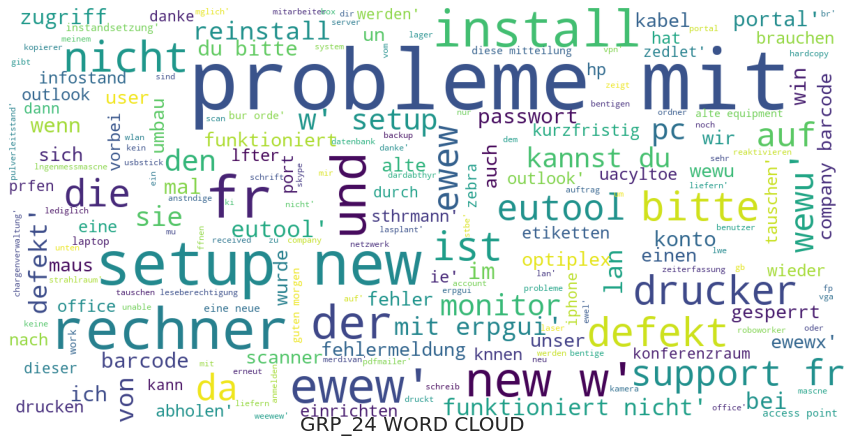

In [ ]:
text_Str1 = data_set['Description'][data_set['Assignment group'].isin(["GRP_24"])].tolist()
show_wordcloud(text_Str1,"GRP_24 WORD CLOUD" )

In [ ]:
targetClassCnt=data_set['Assignment group'].value_counts()
targetClassCnt.describe()

count      74.000000
mean      112.310811
std       461.513796
min         1.000000
25%         4.250000
50%        24.000000
75%        79.750000
max      3936.000000
Name: Assignment group, dtype: float64

**Observation**
Appears the Target class distrubtion is extremely skewed
1. Large no of entries for GRP_0 (mounting to 3936) which account for ~50% of the data
2. there are groups with 1 entry also. We could merge all groups with small entries to a group to reduce the imbalance in the target. 
3. This may reduce the imbalance to some extent.

In [ ]:
sample = data_set.groupby(['Assignment group'])
regroup=[]
for grp in data_set['Assignment group'].unique():
  if(sample.get_group(grp).shape[0]<10):
    regroup.append(grp)
print('Found {} groups which have under 10 samples'.format(len(regroup)))
data_set['Assignment group']=data_set['Assignment group'].apply(lambda x : 'misc_grp' if x in regroup  else x)

# Unique Groups check 
data_set['Assignment group'].unique()

Found 27 groups which have under 10 samples


array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_31', 'GRP_33',
       'GRP_34', 'misc_grp', 'GRP_36', 'GRP_37', 'GRP_39', 'GRP_40',
       'GRP_41', 'GRP_42', 'GRP_44', 'GRP_45', 'GRP_47', 'GRP_50',
       'GRP_53', 'GRP_60', 'GRP_62', 'GRP_65'], dtype=object)

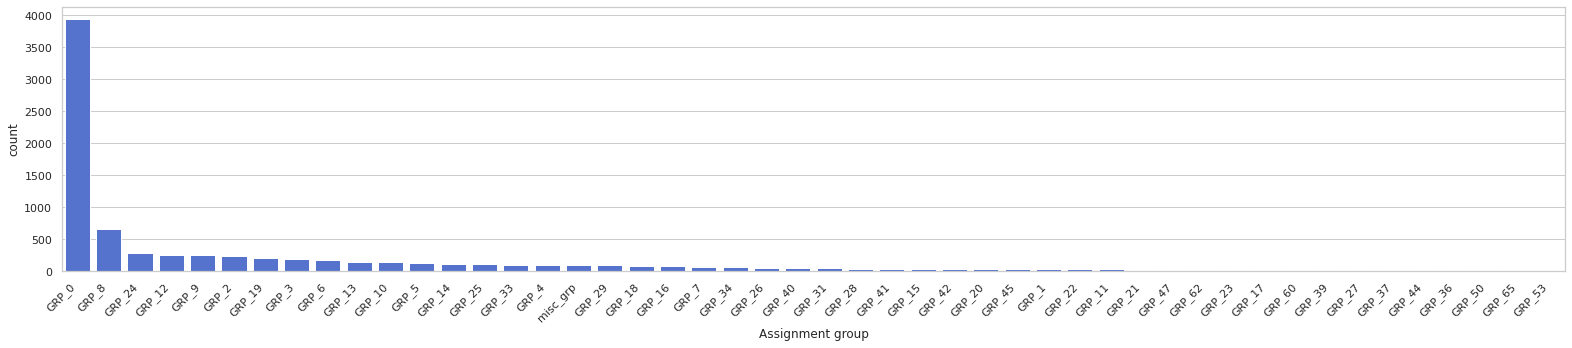

In [ ]:

descending_order = data_set['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#added code for x label rotate 
ax=sns.countplot(x='Assignment group', data=data_set, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

### **Resampling the Data**

In [ ]:
maxOthers = data_set['Assignment group'].value_counts().max()
maxOthers

3976

In [ ]:
# from sklearn.utils import resample

In [ ]:
# data_set_resampled = data_set[0:0]
# for grp in data_set['Assignment group'].unique():
#     itTicketGrpDF = data_set[data_set['Assignment group'] == grp]
#     resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers), random_state=123)
#     data_set_resampled = data_set_resampled.append(resampled)

# descending_order = data_set_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
# plt.subplots(figsize=(22,5))
# #add code to rotate the labels
# ax=sns.countplot(x='Assignment group', data=data_set_resampled, color='royalblue')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# plt.tight_layout()
# plt.show()

In [ ]:
#data_set_resampled.shape

In [ ]:
data_set.head()

,Short description,Description,Caller,Assignment group,language,num_wds,avg_word,uniq_wds,GRP_MOD
0,login issue,verified user detailsemployee manager name che...,spxjnwir pjlcoqds,GRP_0,en,21,6.00,17,GRP_0
1,outlook,received team meetingsskype meeting etc appear...,hmjdrvpb komuaywn,GRP_0,en,12,6.75,12,GRP_0
2,cant log in to vpn,received cannot log vpn,eylqgodm ybqkwiam,GRP_0,en,4,5.00,4,GRP_0
3,unable to access hrtool page,unable access hrtool page,xbkucsvz gcpydteq,GRP_0,it,4,5.50,4,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,no,2,5.00,2,GRP_0


In [ ]:
# data_set_resampled.head()

**Keeping only Description and Assignment group column dropping other columns**

In [ ]:
data_set.drop(labels=['Short description','Caller','language','num_wds','avg_word','uniq_wds','GRP_MOD'], axis=1, inplace=True)
# data_set_resampled.drop(labels=['Short description','Caller','language','num_wds','avg_word','uniq_wds','GRP_MOD'], axis=1, inplace=True)

In [ ]:
data_set.head()

,Description,Assignment group
0,verified user detailsemployee manager name che...,GRP_0
1,received team meetingsskype meeting etc appear...,GRP_0
2,received cannot log vpn,GRP_0
3,unable access hrtool page,GRP_0
4,skype error,GRP_0


**We have Resampled data for each group to 3936 rows, so we have both upsampled data class imbalance removed [data_set_resampled] and raw data[data_set]**

- TFIDF word density

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=250, analyzer = 'word', min_df=2, max_df=0.95, ngram_range=(1, 2))
inc_tfidf = tfidf.fit_transform(data_set['token_desc'])

In [ ]:
inc_tfidf.shape

(8311, 250)

In [ ]:
print(len(inc_tfidf.todense()))

8311


In [ ]:
tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

In [ ]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
received,2.275702
job,3.097898
monitoringtool,3.140969
jobscheduler,3.150223
received monitoringtool,3.156441
password,3.208720
erp,3.248949
failed,3.253520
failed jobscheduler,3.328421
monitoringtool job,3.358499


In [ ]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(10)

,tfidf
outside accessgroup,7.946014
dst outside,7.946014
tcp src,7.722870
deny tcp,7.722870
inside dst,7.540549
src inside,7.540549
accessgroup,7.540549
accessgroup aclinside,7.540549
aclinside,7.540549
asa deny,7.540549


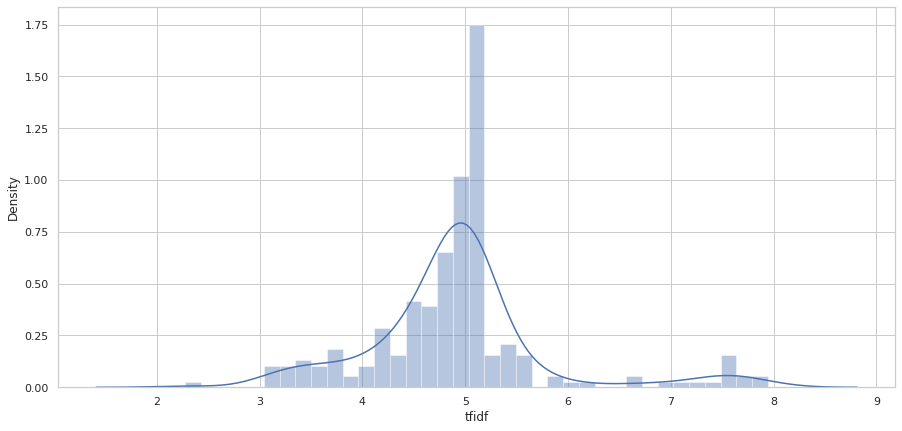

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(tfidf["tfidf"])

In [ ]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8311 samples in 0.016s...
[t-SNE] Computed neighbors for 8311 samples in 1.051s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8311
[t-SNE] Computed conditional probabilities for sample 2000 / 8311
[t-SNE] Computed conditional probabilities for sample 3000 / 8311
[t-SNE] Computed conditional probabilities for sample 4000 / 8311
[t-SNE] Computed conditional probabilities for sample 5000 / 8311
[t-SNE] Computed conditional probabilities for sample 6000 / 8311
[t-SNE] Computed conditional probabilities for sample 7000 / 8311
[t-SNE] Computed conditional probabilities for sample 8000 / 8311
[t-SNE] Computed conditional probabilities for sample 8311 / 8311
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.431877
[t-SNE] KL divergence after 500 iterations: 0.960767


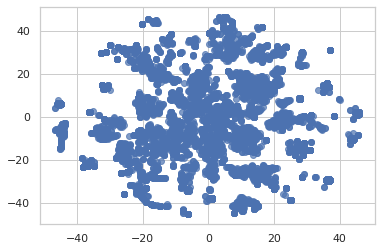

In [ ]:
tfidf_df = pd.DataFrame(tsne_tfidf, columns=['x', 'y'])
plt.scatter(tfidf_df.x, tfidf_df.y, alpha=0.7)

### **Tokenizing the normal and upsampled data**

---



In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
data_set['token_desc'] = data_set['Description'].apply(lambda x: tokenizer.tokenize(x))
# data_set_resampled['token_desc'] = data_set_resampled['Description'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

data_set['token_desc'] = data_set['token_desc'].apply(lambda x : combine_text(x))
# data_set_resampled['token_desc'] = data_set_resampled['token_desc'].apply(lambda x : combine_text(x))

## **ML Models on upsampled and normal data**

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.multiclass import OneVsRestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.pipeline import make_pipeline

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn. pipeline import Pipeline

from imblearn.pipeline import Pipeline as imb_pip
from imblearn.over_sampling import RandomOverSampler


- splitting our dataset to test and training data

In [ ]:
df_inc_sample = data_set[data_set['Assignment group'].map(data_set['Assignment group'].value_counts()) > 100])]

In [ ]:
# df_inc_sample = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/df_inc_sample.xlsx')

In [ ]:
df_inc_sample.head()

,Short description,Description,Caller,Assignment group,language,num_wds,avg_word,uniq_wds,token_desc
0,login issue,verified user detailsemployee manager name che...,spxjnwir pjlcoqds,GRP_0,en,21,6.000000,17,verified user detailsemployee manager name che...
1,outlook,received hmjdrvpbkomuaywn team meetingsskype m...,hmjdrvpb komuaywn,GRP_0,en,13,7.461538,13,received hmjdrvpbkomuaywn team meetingsskype m...
2,cant log in to vpn,received eylqgodmybqkwiam cannot log vpn,eylqgodm ybqkwiam,GRP_0,en,5,7.200000,5,received eylqgodmybqkwiam cannot log vpn
3,unable to access hrtool page,unable access hrtool page,xbkucsvz gcpydteq,GRP_0,it,4,5.500000,4,unable access hrtool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,no,2,5.000000,2,skype error


In [ ]:
x = df_inc_sample['token_desc']
y = df_inc_sample['Assignment group']

encoder = preprocessing.LabelEncoder() 
encoder.fit(y)
y = encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y) 

log_cols=["Classifier", "accuracy","f1_score"]
log = pd.DataFrame(columns=log_cols)

In [ ]:
from sklearn.svm import LinearSVC

svc_normal = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(loss='hinge',random_state=42)),
               ])
svc_normal.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(loss='hinge', random_state=42))])

In [ ]:
svc_upsample = imb_pip([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('ovrsamp',RandomOverSampler('minority',random_state=10)), #upsample - included imb_pip and RandomOverSampler and removed upsampled dataset
                ('clf', LinearSVC(loss='hinge',random_state=42)),
               ])
svc_upsample.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('ovrsamp',
                 RandomOverSampler(random_state=10,
                                   sampling_strategy='minority')),
                ('clf', LinearSVC(loss='hinge', random_state=42))])

### SVC on Raw data

In [ ]:
y_pred_svc_normal = svc_normal.predict(X_test)
print('Test_accuracy %s' % accuracy_score(y_pred_svc_normal, y_test))
print('f1 score %s' % f1_score(y_pred_svc_normal, y_test,average='weighted')) 

print(classification_report(y_test, y_pred_svc_normal))

print(confusion_matrix(y_test,y_pred_svc_normal))

results_ml=pd.DataFrame()
tempResultsDf_ml_svc_normal = pd.DataFrame({'Model':['SVCClassifier_rawdata'], 'accuracy': [metrics.accuracy_score(y_test, y_pred_svc_normal)]},index={'1'})
results_ml = pd.concat([results_ml, tempResultsDf_ml_svc_normal])
results_ml

Test_accuracy 0.7653352353780314
f1 score 0.783729370836639
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       791
           1       0.82      0.50      0.62        28
           2       0.25      0.58      0.35        52
           3       0.81      0.59      0.68        29
           4       0.64      0.29      0.40        24
           5       0.65      0.30      0.41        43
           6       0.65      0.31      0.42        48
           7       0.89      0.95      0.92        58
           8       0.75      0.39      0.51        23
           9       0.80      0.30      0.44        40
          10       0.70      0.33      0.45        21
          11       0.73      0.42      0.54        26
          12       0.86      0.65      0.74        37
          13       0.78      0.61      0.68       132
          14       0.56      0.18      0.27        50

    accuracy                           0.77      1402
   macro avg       0

,Model,accuracy
1,SVCClassifier_rawdata,0.765335


### SVC on Upsampled data

In [ ]:
y_pred_svc_upsample = svc_upsample.predict(X_test)
print('Test_accuracy %s' % accuracy_score(y_pred_svc_upsample, y_test))
print('f1 score %s' % f1_score(y_pred_svc_upsample, y_test,average='weighted')) 

print(classification_report(y_test, y_pred_svc_upsample))

print(confusion_matrix(y_test,y_pred_svc_upsample))


tempResultsDf_ml_svc_upsample = pd.DataFrame({'Model':['SVCClassifier_upsampled'], 'accuracy': [metrics.accuracy_score(y_test, y_pred_svc_upsample)]},index={'2'})
results_ml = pd.concat([results_ml, tempResultsDf_ml_svc_upsample])
results_ml

Test_accuracy 0.7646219686162625
f1 score 0.7814929893219542
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       791
           1       0.78      0.50      0.61        28
           2       0.63      0.50      0.56        52
           3       0.81      0.59      0.68        29
           4       0.64      0.29      0.40        24
           5       0.65      0.30      0.41        43
           6       0.68      0.31      0.43        48
           7       0.93      0.93      0.93        58
           8       0.75      0.39      0.51        23
           9       0.72      0.33      0.45        40
          10       0.39      0.62      0.48        21
          11       0.73      0.42      0.54        26
          12       0.30      0.86      0.45        37
          13       0.78      0.61      0.68       132
          14       0.56      0.18      0.27        50

    accuracy                           0.76      1402
   macro avg       

,Model,accuracy
1,SVCClassifier_rawdata,0.765335
2,SVCClassifier_upsampled,0.764622


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_normal = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd_normal.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
sgd_upsample = imb_pip([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('ovrsamp',RandomOverSampler('minority',random_state=10)), #upsample - included imb_pip and RandomOverSampler and removed upsampled dataset
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd_upsample.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('ovrsamp',
                 RandomOverSampler(random_state=10,
                                   sampling_strategy='minority')),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

### SGD on Raw data

In [ ]:
y_pred_sgd_normal = sgd_normal.predict(X_test)
print('Test_accuracy %s' % accuracy_score(y_pred_sgd_normal, y_test))
print('f1 score %s' % f1_score(y_pred_sgd_normal, y_test,average='weighted')) 

print(classification_report(y_test, y_pred_sgd_normal))

print(confusion_matrix(y_test,y_pred_sgd_normal))

tempResultsDf_ml_sgd_normal = pd.DataFrame({'Model':['SGD_Classifier_rawdata'], 'accuracy': [metrics.accuracy_score(y_test, y_pred_sgd_normal)]},index={'3'})
results_ml = pd.concat([results_ml, tempResultsDf_ml_sgd_normal])
results_ml

Test_accuracy 0.7432239657631954
f1 score 0.796994321179847
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       791
           1       0.83      0.36      0.50        28
           2       0.69      0.35      0.46        52
           3       1.00      0.21      0.34        29
           4       0.50      0.08      0.14        24
           5       1.00      0.07      0.13        43
           6       0.81      0.27      0.41        48
           7       0.94      0.81      0.87        58
           8       0.75      0.26      0.39        23
           9       0.50      0.03      0.05        40
          10       1.00      0.14      0.25        21
          11       0.79      0.42      0.55        26
          12       0.86      0.49      0.62        37
          13       0.66      0.80      0.72       132
          14       0.50      0.24      0.32        50

    accuracy                           0.74      1402
   macro avg       0

,Model,accuracy
1,SVCClassifier_rawdata,0.765335
2,SVCClassifier_upsampled,0.764622
3,SGD_Classifier_rawdata,0.743224


### SGD on Upsampled data

In [ ]:
y_pred_sgd_upsample = sgd_upsample.predict(X_test)
print('Test_accuracy %s' % accuracy_score(y_pred_sgd_upsample, y_test))
print('f1 score %s' % f1_score(y_pred_sgd_upsample, y_test,average='weighted')) 

print(classification_report(y_test, y_pred_sgd_upsample))

print(confusion_matrix(y_test,y_pred_sgd_upsample))

tempResultsDf_ml_sgd_upsample = pd.DataFrame({'Model':['SGD_Classifier_upsampled'], 'accuracy': [metrics.accuracy_score(y_test, y_pred_sgd_upsample)]},index={'4'})
results_ml = pd.concat([results_ml, tempResultsDf_ml_sgd_upsample])
results_ml

Test_accuracy 0.7104136947218259
f1 score 0.7639746179583221
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       791
           1       0.83      0.36      0.50        28
           2       0.79      0.29      0.42        52
           3       1.00      0.17      0.29        29
           4       0.33      0.04      0.07        24
           5       0.00      0.00      0.00        43
           6       0.75      0.25      0.38        48
           7       1.00      0.76      0.86        58
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        40
          10       0.16      0.62      0.26        21
          11       0.79      0.42      0.55        26
          12       0.89      0.43      0.58        37
          13       0.62      0.83      0.71       132
          14       0.33      0.06      0.10        50

    accuracy                           0.71      1402
   macro avg       

,Model,accuracy
1,SVCClassifier_rawdata,0.765335
2,SVCClassifier_upsampled,0.764622
3,SGD_Classifier_rawdata,0.743224
4,SGD_Classifier_upsampled,0.710414


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_normal = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg_normal.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_upsample = imb_pip([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('ovrsamp',RandomOverSampler('minority',random_state=10)), #upsample - included imb_pip and RandomOverSampler and removed upsampled dataset
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg_upsample.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('ovrsamp',
                 RandomOverSampler(random_state=10,
                                   sampling_strategy='minority')),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

### Logistic Regression on Raw data

In [ ]:
y_pred_logreg_normal = logreg_normal.predict(X_test)
print('Test_accuracy %s' % accuracy_score(y_pred_logreg_normal, y_test))
print('f1 score %s' % f1_score(y_pred_logreg_normal, y_test,average='weighted')) 

print(classification_report(y_test, y_pred_logreg_normal))

print(confusion_matrix(y_test,y_pred_logreg_normal))

tempResultsDf_ml_logreg_normal = pd.DataFrame({'Model':['LogisticRegression_rawdata'], 'accuracy': [metrics.accuracy_score(y_test, y_pred_logreg_normal)]},index={'5'})
results_ml = pd.concat([results_ml, tempResultsDf_ml_logreg_normal])
results_ml

Test_accuracy 0.775320970042796
f1 score 0.7911698339200196
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       791
           1       0.62      0.57      0.59        28
           2       0.64      0.48      0.55        52
           3       0.65      0.69      0.67        29
           4       0.59      0.42      0.49        24
           5       0.45      0.21      0.29        43
           6       0.60      0.44      0.51        48
           7       0.98      0.90      0.94        58
           8       0.57      0.35      0.43        23
           9       0.63      0.42      0.51        40
          10       0.45      0.43      0.44        21
          11       0.73      0.42      0.54        26
          12       0.88      0.57      0.69        37
          13       0.65      0.80      0.72       132
          14       0.49      0.34      0.40        50

    accuracy                           0.78      1402
   macro avg       0

,Model,accuracy
1,SVCClassifier_rawdata,0.765335
2,SVCClassifier_upsampled,0.764622
3,SGD_Classifier_rawdata,0.743224
4,SGD_Classifier_upsampled,0.710414
5,LogisticRegression_rawdata,0.775321


### Logistic Regression on Upsampled data

In [ ]:
y_pred_logreg_upsample = logreg_upsample.predict(X_test)
print('Test_accuracy %s' % accuracy_score(y_pred_logreg_upsample, y_test))
print('f1 score %s' % f1_score(y_pred_logreg_upsample, y_test,average='weighted')) 

print(classification_report(y_test, y_pred_logreg_upsample))

print(confusion_matrix(y_test,y_pred_logreg_upsample))

tempResultsDf_ml_logreg_upsample = pd.DataFrame({'Model':['LogisticRegression_upsample'], 'accuracy': [metrics.accuracy_score(y_test, y_pred_logreg_upsample)]},index={'3'})
results_ml = pd.concat([results_ml, tempResultsDf_ml_logreg_upsample])
results_ml

Test_accuracy 0.7724679029957204
f1 score 0.7856652992962603
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       791
           1       0.65      0.54      0.59        28
           2       0.64      0.54      0.58        52
           3       0.62      0.69      0.66        29
           4       0.53      0.38      0.44        24
           5       0.50      0.26      0.34        43
           6       0.60      0.44      0.51        48
           7       0.96      0.90      0.93        58
           8       0.53      0.35      0.42        23
           9       0.69      0.45      0.55        40
          10       0.37      0.48      0.42        21
          11       0.73      0.42      0.54        26
          12       0.84      0.57      0.68        37
          13       0.65      0.79      0.71       132
          14       0.47      0.34      0.40        50

    accuracy                           0.77      1402
   macro avg       

,Model,accuracy
1,SVCClassifier_rawdata,0.765335
2,SVCClassifier_upsampled,0.764622
3,SGD_Classifier_rawdata,0.743224
4,SGD_Classifier_upsampled,0.710414
5,LogisticRegression_rawdata,0.775321
3,LogisticRegression_upsample,0.772468


### **Label Encoding 'Assignment group' target class**

In [ ]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping

## **Modelling**

- Here we need to verify our numpy version in order to run our further advanced libraries/models.
- If the code outputs error, make sure you're running the latest library versions. In our case we had error with numpy library

In [ ]:
!pip install --upgrade numpy

In [ ]:
import gensim
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from tensorflow import keras
from keras.regularizers import l2
from sklearn import metrics
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Add Function to capture results from each model 
import operator
def captureData(dataframe,modelHistory,modelName,descriptions,index_df,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    index, acc_value = max(enumerate(modelHistory.history['val_accuracy']), key=operator.itemgetter(1))
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'val_accuracy': [acc_value],
      'val_loss':[modelHistory.history['val_loss'][index]],
      'loss':[modelHistory.history['loss'][index]],
      'accuracy':[modelHistory.history['accuracy'][index]],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','val_accuracy' ,'val_loss','loss','accuracy','descriptions']] 
  return dataframe

def capturePrediction(dataframe,modelName,descriptions,index_df,pred_accuracy,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'Pred_Accuracy' : [pred_accuracy],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','Pred_Accuracy','descriptions']] 
  return dataframe

### **Custom Embedding using Word2Vec**
- convert the dataset to word2vec and save in google drive directory

In [ ]:
sentences = [line.split(' ') for line in data_set['Description']]
word2vec = Word2Vec(sentences=sentences,min_count=1)
word2vec.wv.save_word2vec_format('/content/drive/MyDrive/Colab Notebooks/word2vec_vector.txt')

In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('/content/drive/MyDrive/Colab Notebooks/word2vec_vector.txt')

for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 12547 word vectors.


In [ ]:
maxlen = 300
numWords=9000
epochs = 10

In [ ]:
results=pd.DataFrame()
pred_results = pd.DataFrame()

### **Deep learning Models- LSTM MODEL**

In [ ]:
# data_set_inp=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data_inp_before_LSTM.xlsx')

In [ ]:
class LstmModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
  
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10,stratify=y) # changed by Abraham
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10,stratify=y)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['Description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs,upsample=False):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)

    #upsample - included RamdomOVerSampler for upsampling minority
    if upsample == True:
      rus = RandomOverSampler('minority',random_state=10)
      X_train,y_train = rus.fit_resample(X_train,y_train)
    
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
    lstm=Bidirectional(LSTM(1))(embed)
    drop=Dropout(0.3)(lstm)
    dense =Dense(10,activation='relu')(drop) 
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
   
    self.model.summary()
    plot_model(self.model,to_file="LSTM_Model.jpg")

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)

    print("Number of val Samples:", len(X_Val),len(y_Val))
    print("Number of output nodes:",len((pd.Series(y_train)).unique()))
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))

    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",metrics.accuracy_score(self.y_test, pred))
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

In [ ]:
data_set_inp = data_set[data_set['Assignment group'].map(data_set['Assignment group'].value_counts()) > 100]

In [ ]:
# data_set_resampled['Assignment group'] , grp_mapping_all_resampled= labelencoder(data_set_resampled['Assignment group'])
data_set_inp['Assignment group'],grp_mapping_all_raw = labelencoder(data_set_inp['Assignment group'])

In [ ]:
# data_set_inp.to_excel('/content/drive/MyDrive/Colab Notebooks/data_inp_before_LSTM.xlsx',index=False)

In [ ]:
# Check how the LSTM Model perform with the cleansed data
lstmModelRawData = LstmModel()
lstmModelRawData_history, model = lstmModelRawData.train(data_set_inp,1024,epochs,upsample=False)
rawData_accuracy = lstmModelRawData.prediction()

Number of Samples: 7030
Number of Labels:  7030
Number of train Samples: 5624
Number of val Samples: 1406
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_6 (Embedding)     (None, 300, 100)          900100    
                                                                 
 bidirectional_5 (Bidirectio  (None, 2)                816       
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 2)                 0         
                                                                 
 dense_12 (Dense)            (None, 10)                30        
                                                                 
 dense_13 (Dense) 

- Visualizing Model accuracy on Raw data

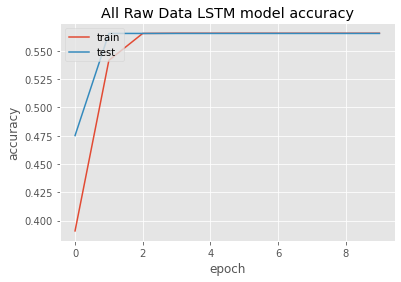

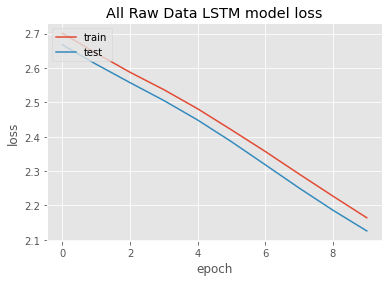

In [ ]:
lstmModelRawData.plotModelAccuracy(lstmModelRawData_history, 'All Raw Data LSTM')

In [ ]:
# Check how the LSTM Model perform with all the data which is cleansed & resampled to 3936 to make the target balance
epochs = 10
lstmModelAllDataResampled = LstmModel()
lstmModelAllDataResampled_history, model = lstmModelAllDataResampled.train(data_set_inp,1024,epochs,upsample=True)
resampled_accuracy = lstmModelAllDataResampled.prediction()

Number of Samples: 7030
Number of Labels:  7030
Number of train Samples: 5624
Number of val Samples: 1406
Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 300)]             0         
                                                                 
 embedding_10 (Embedding)    (None, 300, 100)          900100    
                                                                 
 bidirectional_9 (Bidirectio  (None, 2)                816       
 nal)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 2)                 0         
                                                                 
 dense_20 (Dense)            (None, 10)                30        
                                                                 
 dense_21 (Dense) 

- Visualizing Model accuracy on Resampled data

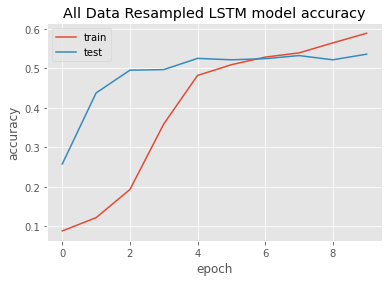

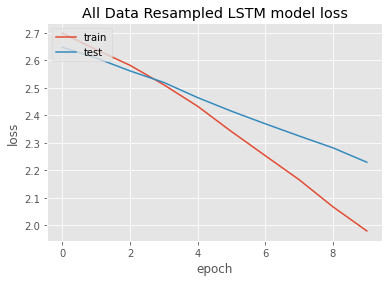

In [ ]:
lstmModelAllDataResampled.plotModelAccuracy(lstmModelAllDataResampled_history, 'All Data Resampled LSTM')

In [ ]:
results_dl=pd.DataFrame()
pred_results = pd.DataFrame()
results_dl=captureData(results,lstmModelRawData_history,'LSTM model_WV_rawdata','LSTM+Word2Vec Embedding on raw data','1',0)
pred_results= capturePrediction(pred_results,'LSTM model_WV_rawdata','LSTM+Word2Vec Embedding on raw data','1',rawData_accuracy,0)

In [ ]:
results_dl

,model,val_accuracy,val_loss,loss,accuracy,descriptions
1,LSTM model_WV_rawdata,0.565434,2.610705,2.642768,0.541607,LSTM+Word2Vec Embedding on raw data


In [ ]:
results_dl=captureData(results_dl,lstmModelAllDataResampled_history,'LSTM model_WV_resampled data','LSTM+Word2Vec Embedding on Augmented data','2',0)
pred_results= capturePrediction(pred_results,'LSTM model_WV_resampled data','LSTM+Word2Vec Embedding on Augmented data','2',resampled_accuracy,0)

In [ ]:
results_dl

,model,val_accuracy,val_loss,loss,accuracy,descriptions
1,LSTM model_WV_rawdata,0.565434,2.610705,2.642768,0.541607,LSTM+Word2Vec Embedding on raw data
2,LSTM model_WV_resampled data,0.536273,2.229296,1.979571,0.589288,LSTM+Word2Vec Embedding on Augmented data


### **Glove Embedding**

In [ ]:
glove_file = '/content/drive/MyDrive/Colab Notebooks/300d.zip'
print(glove_file)

/content/drive/MyDrive/Colab Notebooks/300d.zip


In [ ]:
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [ ]:
EMBEDDING_FILE = './glove.6B.300d.txt'
embeddings_glove = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings_glove[word] = embd

In [ ]:
print("Dimension of the embedding vector is {}".format(len(embeddings_glove["collaboration"])))
print("Dimension of the embedding vector is {}".format(len(embeddings_glove["platform"])))

Dimension of the embedding vector is 300
Dimension of the embedding vector is 300


In [ ]:
maxlen = 300
numWords=9000
epochs = 15

### **LSTM Model using Glove**

In [ ]:
class LstmGloveModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10,stratify=y) # changed by Abraham
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10,stratify=y)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe):
    
    tokenizer,X = self.wordTokenizer(dataframe['Description'])
    y = np.asarray(dataframe['Assignment group'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1, 300))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_glove.get(word)
        if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs,upsample=False):
   
    X,y = self.tokenizeAndEmbedding(dataframe)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)

    #upsample - included RamdomOVerSampler for upsampling minority
    if upsample == True:
      rus = RandomOverSampler('minority',random_state=10)
      X_train,y_train = rus.fit_resample(X_train,y_train)

    
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=300,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
    lstm=Bidirectional(LSTM(1))(embed)
    drop=Dropout(0.3)(lstm)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
    
    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    print("Number of val Samples:", len(X_Val),len(y_Val))
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))
    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",accuracy)
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()


In [ ]:
lstmModelRawData = LstmGloveModel()
lstmModelRawData_history, model = lstmModelRawData.train(data_set_inp,100,epochs,upsample=False)
lstm_raw_accuracy = lstmModelRawData.prediction()

Number of Samples: 7030
Number of Labels:  7030
Number of train Samples: 5624
Number of val Samples: 1406
Number of val Samples: 1406 1406
Epoch 1/15
57/57 [==============================] - ETA: 0s - loss: 2.6805 - accuracy: 0.5644
Epoch 1: val_accuracy improved from -inf to 0.56543, saving model to model-001-0.565434.h5
57/57 [==============================] - 44s 656ms/step - loss: 2.6805 - accuracy: 0.5644 - val_loss: 2.6516 - val_accuracy: 0.5654 - lr: 0.0010
Epoch 2/15
57/57 [==============================] - ETA: 0s - loss: 2.6249 - accuracy: 0.5656
Epoch 2: val_accuracy did not improve from 0.56543
57/57 [==============================] - 35s 616ms/step - loss: 2.6249 - accuracy: 0.5656 - val_loss: 2.5970 - val_accuracy: 0.5654 - lr: 0.0010
Epoch 3/15
57/57 [==============================] - ETA: 0s - loss: 2.5714 - accuracy: 0.5656
Epoch 3: val_accuracy did not improve from 0.56543
57/57 [==============================] - 35s 613ms/step - loss: 2.5714 - accuracy: 0.5656 - val_

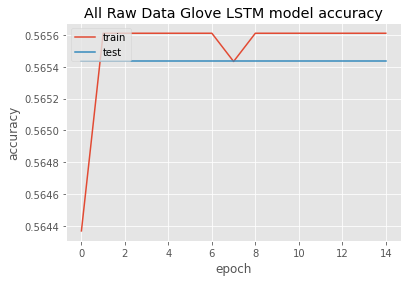

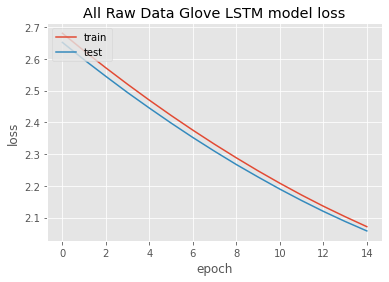

In [ ]:
lstmModelRawData.plotModelAccuracy(lstmModelRawData_history, 'All Raw Data Glove LSTM')

In [ ]:
#Check how the LSTM Model perform with all the data which is cleansed & resampled to 3936 to make the target balance
epochs=10
lstmModelAllDataResampled = LstmGloveModel()
lstmModelAllDataResampled_history, model = lstmModelAllDataResampled.train(data_set_inp,1000,epochs,upsample=True)
lstm_allResampled_accuracy = lstmModelAllDataResampled.prediction()

Number of Samples: 7030
Number of Labels:  7030
Number of train Samples: 5624
Number of val Samples: 1406
Number of val Samples: 1406 1406
Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 2.6842 - accuracy: 0.3396
Epoch 1: val_accuracy improved from -inf to 0.40114, saving model to model-001-0.401138.h5
9/9 [==============================] - 44s 4s/step - loss: 2.6842 - accuracy: 0.3396 - val_loss: 2.6762 - val_accuracy: 0.4011 - lr: 0.0010
Epoch 2/10
9/9 [==============================] - ETA: 0s - loss: 2.6073 - accuracy: 0.5032
Epoch 2: val_accuracy improved from 0.40114 to 0.43030, saving model to model-002-0.430299.h5
9/9 [==============================] - 36s 4s/step - loss: 2.6073 - accuracy: 0.5032 - val_loss: 2.6199 - val_accuracy: 0.4303 - lr: 0.0010
Epoch 3/10
9/9 [==============================] - ETA: 0s - loss: 2.4811 - accuracy: 0.5303
Epoch 3: val_accuracy improved from 0.43030 to 0.46799, saving model to model-003-0.467994.h5
9/9 [=====================

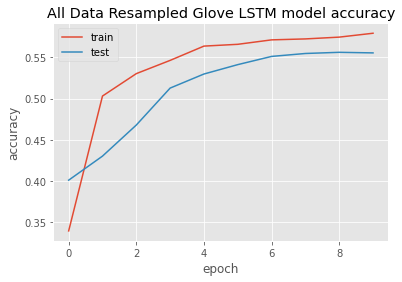

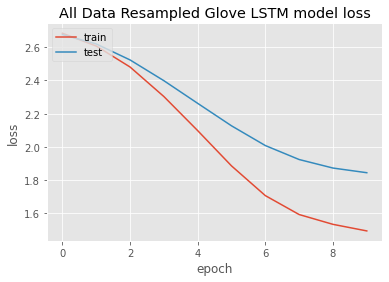

In [ ]:
lstmModelAllDataResampled.plotModelAccuracy(lstmModelAllDataResampled_history, 'All Data Resampled Glove LSTM')

In [ ]:
results_dl=captureData(results_dl,lstmModelRawData_history,'LSTM model_GloVe_rawdata','LSTM+GloVe Embedding on raw data','3',0)
pred_results= capturePrediction(pred_results,'LSTM model_GloVe_rawdata','LSTM+GloVe Embedding on raw data','4',lstm_raw_accuracy,0)

In [ ]:
results_dl=captureData(results_dl,lstmModelAllDataResampled_history,'LSTM model_GloVe_resampled data','LSTM+GloVe Embedding on Augmented data','4',0)
pred_results= capturePrediction(pred_results,'LSTM model_GloVe_resampled data','LSTM+GloVe Embedding on Augmented data','5',lstm_allResampled_accuracy,0)

In [ ]:
results_dl

,model,val_accuracy,val_loss,loss,accuracy,descriptions
1,LSTM model_WV_rawdata,0.565434,2.610705,2.642768,0.541607,LSTM+Word2Vec Embedding on raw data
2,LSTM model_WV_resampled data,0.536273,2.229296,1.979571,0.589288,LSTM+Word2Vec Embedding on Augmented data
3,LSTM model_GloVe_rawdata,0.565434,2.651581,2.680491,0.564367,LSTM+GloVe Embedding on raw data
4,LSTM model_GloVe_resampled data,0.556188,1.873258,1.534558,0.574607,LSTM+GloVe Embedding on Augmented data


## **Observations**

### **Normal ML Model Results**

In [ ]:
results_ml

,Model,accuracy
1,SVCClassifier_rawdata,0.765335
2,SVCClassifier_upsampled,0.764622
3,SGD_Classifier_rawdata,0.743224
4,SGD_Classifier_upsampled,0.710414
5,LogisticRegression_rawdata,0.775321
3,LogisticRegression_upsample,0.772468


1. **Normal ML Models tend to perform much better when we have upsampled our data due to the fact that class imbalance has been removed.**
2. **SVC Classifier and logistic regression performs equally on cleansed data which is not upsampled.**
3. **Logistic Regression model is best performing model on upsampled data with 94.7% accuracy**

### **Deep Learning Model Results- LSTM**

In [ ]:
results_dl

,model,val_accuracy,val_loss,loss,accuracy,descriptions
1,LSTM model_WV_rawdata,0.565434,2.610705,2.642768,0.541607,LSTM+Word2Vec Embedding on raw data
2,LSTM model_WV_resampled data,0.536273,2.229296,1.979571,0.589288,LSTM+Word2Vec Embedding on Augmented data
3,LSTM model_GloVe_rawdata,0.565434,2.651581,2.680491,0.564367,LSTM+GloVe Embedding on raw data
4,LSTM model_GloVe_resampled data,0.556188,1.873258,1.534558,0.574607,LSTM+GloVe Embedding on Augmented data


1. **Deep Learning Model LSTM is trained on custom word embedding created using Word2Vec.**
2. **Deep Learning model LSTM is trained on pre trained GLove embedding**
3. **However Deep learning model LSTM in both the cases perform better when class imbalance is removed by upsampling the data**
4. **LSTM model trained on upsampled data using pre-trained Glove embedding performs best out of all the models including ml models.** 